In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
from sklearn.preprocessing import QuantileTransformer

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [4]:
from tensorflow.keras.optimizers import Adam, SGD

In [5]:
df = pd.read_csv(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code\done_data.csv")
df.loc[:, 'target_return'] = df.groupby('tic')['adjcp'].apply(lambda x: x.pct_change().shift(-1))
df.dropna(inplace = True)

<AxesSubplot:xlabel='datadate'>

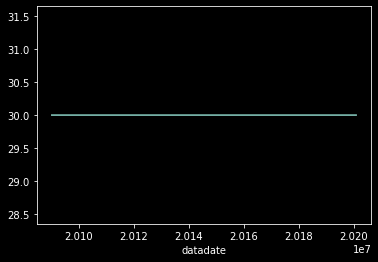

In [6]:
df.groupby('datadate')['tic'].count().plot()

In [7]:
features = ['macd', 'rsi', 'cci', 'adx']
# features = ['macd']
target = ['target_return']
NORMALIZER = 100

In [8]:
X = df[features].values
# X = QuantileTransformer(output_distribution = 'normal').fit_transform(X)
y = df[target].values * NORMALIZER

In [9]:
# X = np.random.normal(0, 1, (200, 3))
# y = np.random.normal(0, 1, (200, 1))

In [10]:
print(X.shape, y.shape)

(87750, 4) (87750, 1)


In [11]:
# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(n_outputs, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate = 1e-3))
#     model.compile(loss='mse', optimizer=SGD(learning_rate = 1e-3))
    return model

In [13]:
n_inputs, n_outputs = X.shape[1], y.shape[1]
model = get_model(n_inputs, n_outputs)

In [14]:
%%time
hist = model.fit(X, y, verbose=1, epochs=1500, batch_size = 4096, )

Epoch 1/1500
22/22 [==============================] - 1s 5ms/step - loss: 3.5554
Epoch 2/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8876
Epoch 3/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8727
Epoch 4/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8603
Epoch 5/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8395
Epoch 6/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8137
Epoch 7/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8335
Epoch 8/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.7998
Epoch 9/1500
22/22 [==============================] - 0s 6ms/step - loss: 2.7923
Epoch 10/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.8911
Epoch 11/1500
22/22 [==============================] - 0s 5ms/step - loss: 2.7738
Epoch 12/1500
22/22 [==============================] - 0s 6ms/step - loss: 2.7780
Epoch 13/1500
22/22 [====

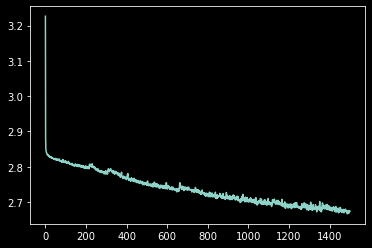

In [15]:
plt.plot(hist.history['loss'])

In [16]:
yhat = model.predict(X)#/NORMALIZER

In [17]:
np.corrcoef(yhat.reshape(-1), y.reshape(-1))

array([[1.        , 0.25773542],
       [0.25773542, 1.        ]])

In [101]:
((y.reshape(-1) - yhat.reshape(-1))**2).mean()

2.8331224771163415

In [30]:
pd.DataFrame({'yhat': yhat})

ValueError: If using all scalar values, you must pass an index

In [14]:
pnl = (yhat * y).sum(axis = 1)

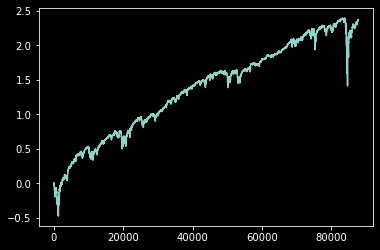

In [15]:
plt.plot((pnl).cumsum())

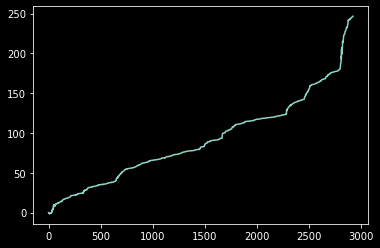

In [23]:
plt.plot((pnl).cumsum())

In [46]:
sample_actions = pd.read_pickle(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code\list_actions.pkl")

In [47]:
yhat_rl = np.array(sample_actions)

In [48]:
np.corrcoef(yhat_rl.reshape(-1), y.reshape(-1))

array([[1.        , 0.03356229],
       [0.03356229, 1.        ]])

In [49]:
np.corrcoef(yhat_rl.reshape(-1), yhat.reshape(-1))

array([[1.        , 0.08291997],
       [0.08291997, 1.        ]])

In [50]:
pnl_rl = (yhat_rl * y).sum(axis = 1)

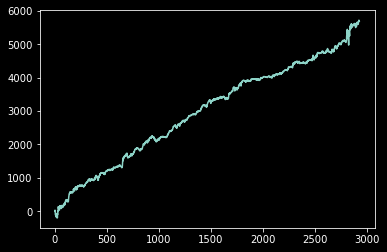

In [44]:
plt.plot((pnl_rl).cumsum())

(array([28694.,  1187.,  1233.,  1202.,  1271.,  1247.,  1261.,  1215.,
         1318., 49122.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

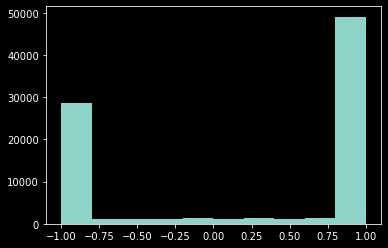

In [52]:
plt.hist(np.array(sample_actions).reshape(-1))

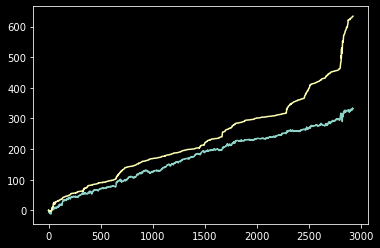

In [45]:
plt.plot((pnl_rl/pnl_rl.std()).cumsum())
plt.plot((pnl/pnl.std()).cumsum())